Puzzle 1
----

In [1]:
from collections import defaultdict
from lolviz import objviz

In [2]:
class GNode:
    def __init__(self, value):
        self.value = value
        self.edges = [] # outgoing edges
        
    def connect(self, other):
        self.edges.append(other)

path = ''
def walk(g, visited):
    "Walk of a tree - alphabetically when node has no dependencies"
    global available
    global path
    if g is None or g in visited: 
        return
        
    visited.add(g) # mark as visited
    path += g.value # process node before visiting next node
    
    for node in g.edges:
        node_dependency[node.value].remove(g.value)
        if node_dependency[node.value] == set() and \
        (node.value,node) not in available:
            available.append((node.value,node))
    
    sort_available = sorted(available, key=lambda x: x[0])  # sort by alphabet
    
    for val, node in sort_available:
        walk(node, visited) # walk all outgoing edge targets alphabetically

Read in Data & Create Nodes/Tree

In [3]:
node_dependency = defaultdict(set)
nodes = dict()  # dictionary of node objects
rules = list() #(step, next step)

with open('input.txt', 'r') as f:
    for line in f:
        step = line[5]
        next_step = line[36]
        rules.append((step, next_step))
        
        if step not in nodes.keys():
            nodes[step] = GNode(step) #building all potential nodes
        if next_step not in nodes.keys():
            nodes[next_step] = GNode(next_step)
        
        node_dependency[next_step].add(step) 

for step, next_step in rules:  # building connections
    nodes[step].connect(nodes[next_step])

Where to start?

In [4]:
d = set([l for s in node_dependency.values() for l in s]) # getting all potential nodes
begining_nodes = [l for l in d if l not in node_dependency.keys()] # getting those nodes with 0 dependencies

start = sorted(begining_nodes)[0]  # getting the node to begin with (alphabetically)
available = [(l, nodes[l]) for l in sorted(begining_nodes)[1:]] # any remaing node with 0 dependency is available

In [5]:
print(f'Start at node {start}')

Start at node O


Time to walk the tree

In [7]:
walk(nodes[start], set())
print(path)

OCPUEFIXHRGWDZABTQJYMNKVSL


Visualize Tree

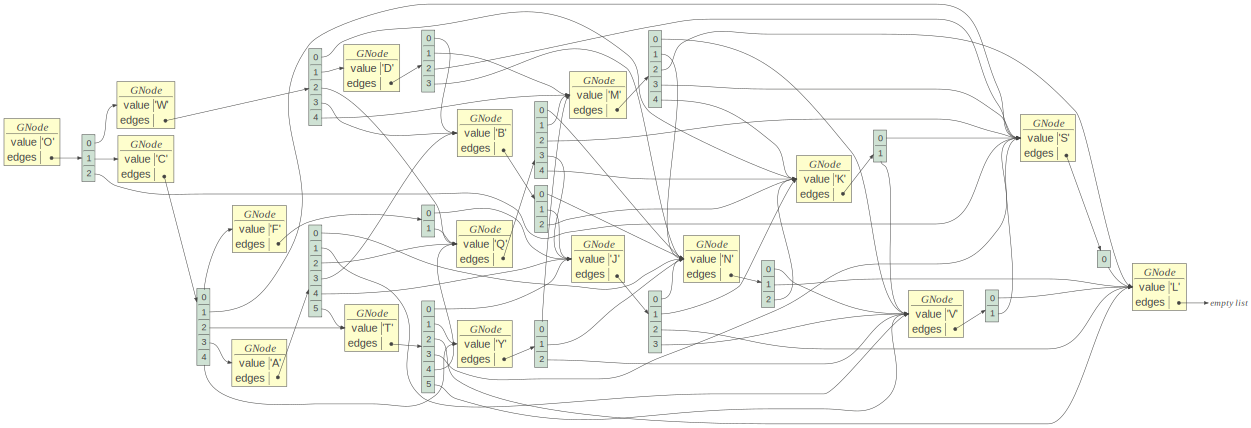

In [18]:
objviz(nodes[start])

Time to walk tree

O
C
P
U
E
F
I
X
H
R
G
W
D
Z
A
B
T
Q
J
Y
M
N
K
V
S
L


In [3]:
rules = list() #(step, next step)

node_dependency = defaultdict(set)
for line in content.split('\n'):
    step = line[5]
    next_step = line[36]
    rules.append((step, next_step))
    
    node_dependency[next_step].add(step)

In [6]:
A = GNode('A')
B = GNode('B')
C = GNode('C')
D = GNode('D')
E = GNode('E')
F = GNode('F')

In [7]:
C.connect(A)
C.connect(F)
A.connect(B)
A.connect(D)
B.connect(E)
D.connect(E)
F.connect(E)

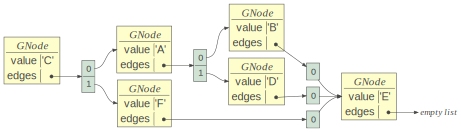

In [9]:
objviz(C)

In [12]:
available = list()
def walk(g, visited):
    "Depth-first walk of a graph"
    global available
    if g is None or g in visited: 
        return
#     if (g.value, g) in available: # no longer available because has been visited
#         index = available.index((g.value, g))
#         available.pop(index)
        
    visited.add(g) # mark as visited
    print(g.value) # process before visiting outgoing edges
    
    for node in g.edges:
        node_dependency[node.value].remove(g.value)
        if node_dependency[node.value] == set() and \
        (node.value,node) not in available:
            available.append((node.value,node))
    
    sort_available = sorted(available, key=lambda x: x[0])  # sort by letter
    
    for val, node in sort_available:
        walk(node, visited) # walk all outgoing edge targets

In [13]:
walk(C, set())
# x = [('x', 'y'), ('x', 'x')]
# if ('x', 'y') in x:
#     index = x.index(('x', 'y'))
#     x.pop(index)

C
A
B
D
F
E


In [ ]:
x

In [ ]:
x.index(('x', 'y'))

In [ ]:
sorted([(n.value,n) for n in C.edges], key=lambda x: x[0])